In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [194]:
data=pd.read_csv("heart.csv")

In [195]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Visualisation of data

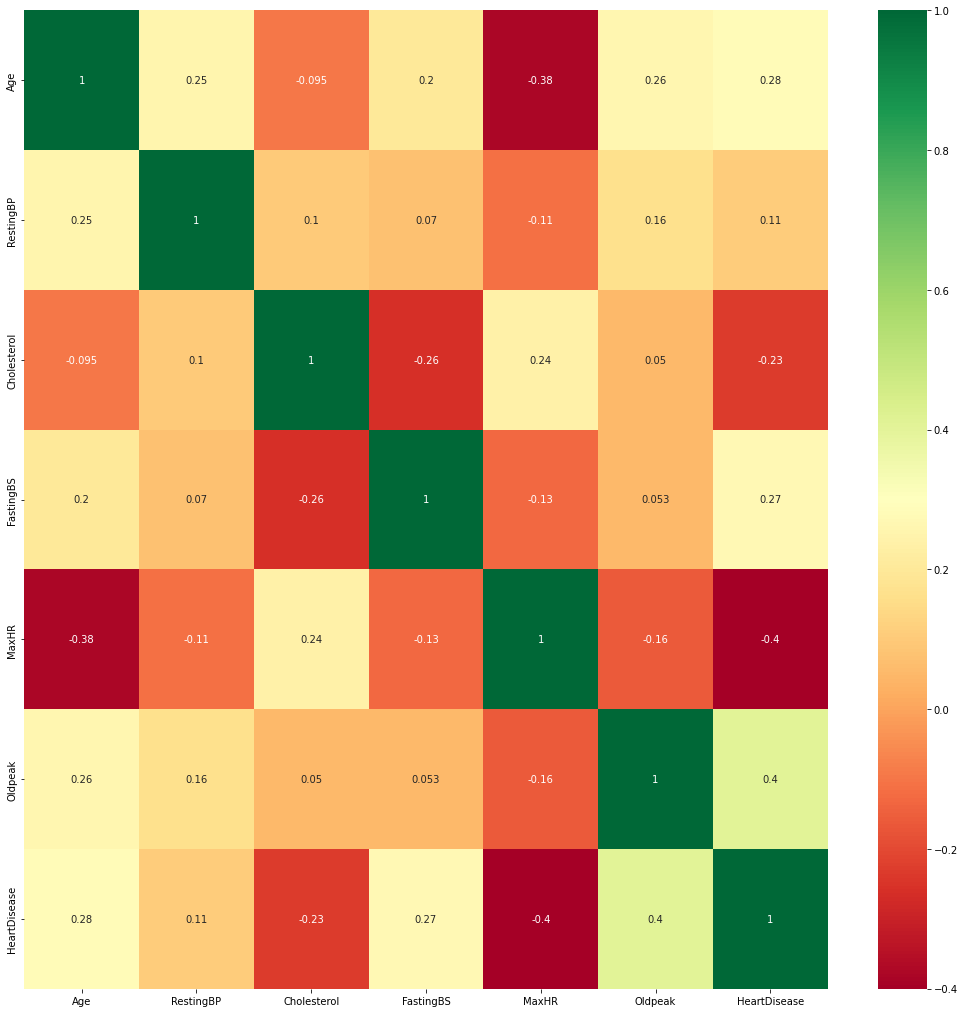

In [197]:
import seaborn as sns
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

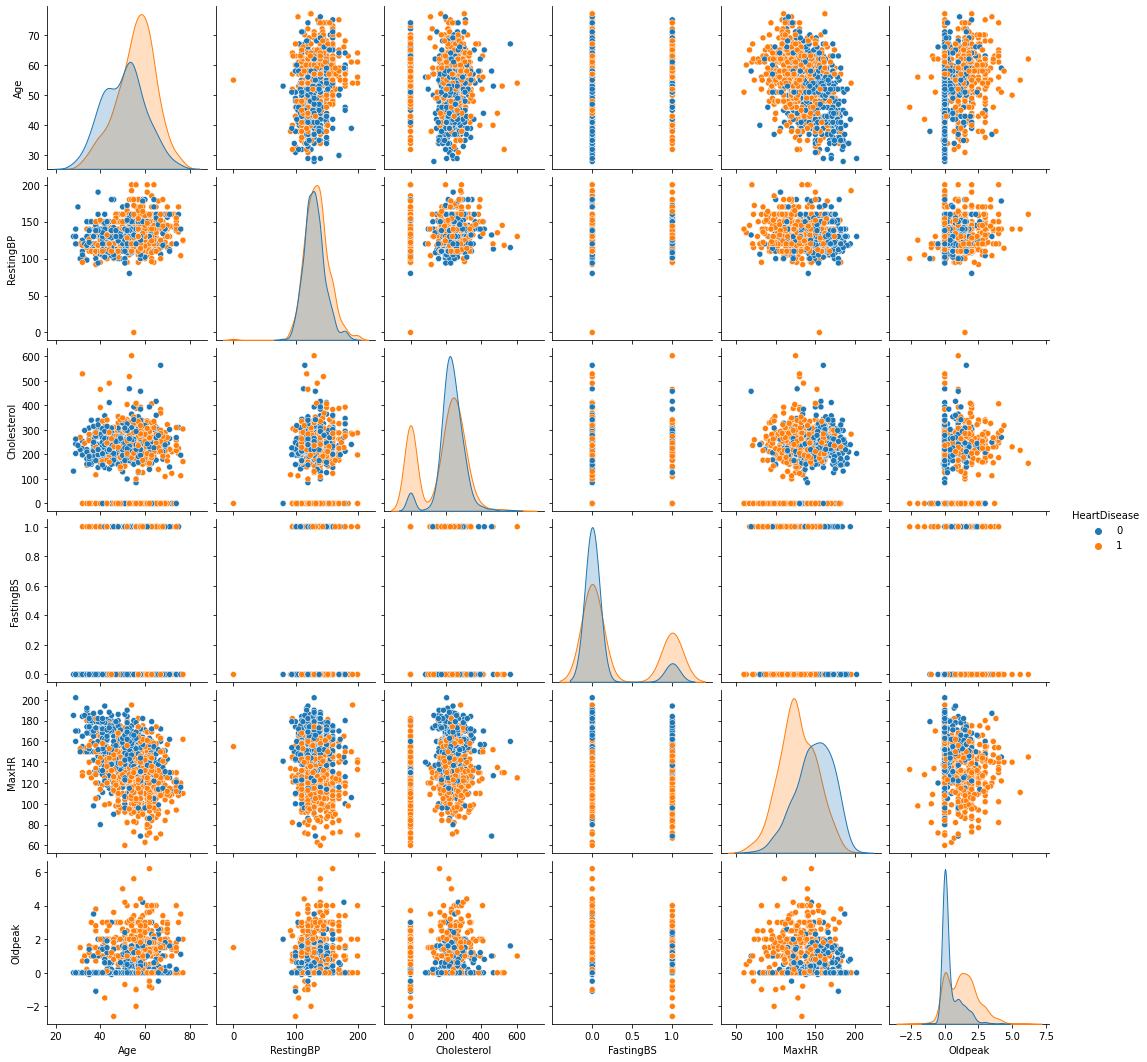

In [198]:
sns.pairplot(data=data, hue = 'HeartDisease')
plt.savefig("pne.png")

In [199]:
categorical_list = ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]

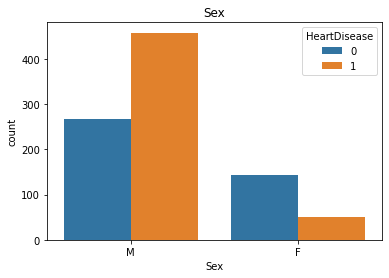

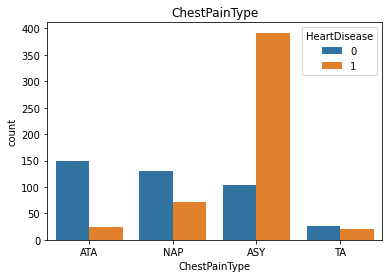

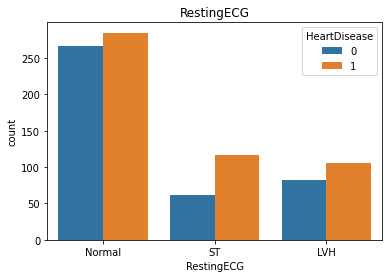

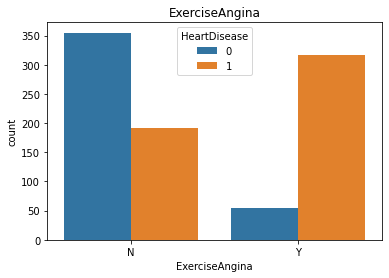

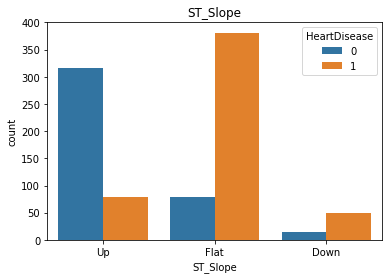

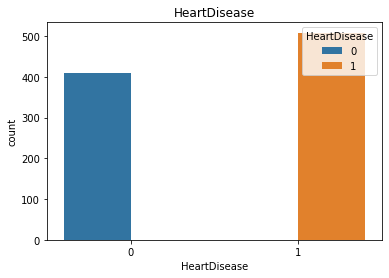

In [200]:
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "HeartDisease")
    plt.title(i)

In [201]:
numeric_list = ["Age", "RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

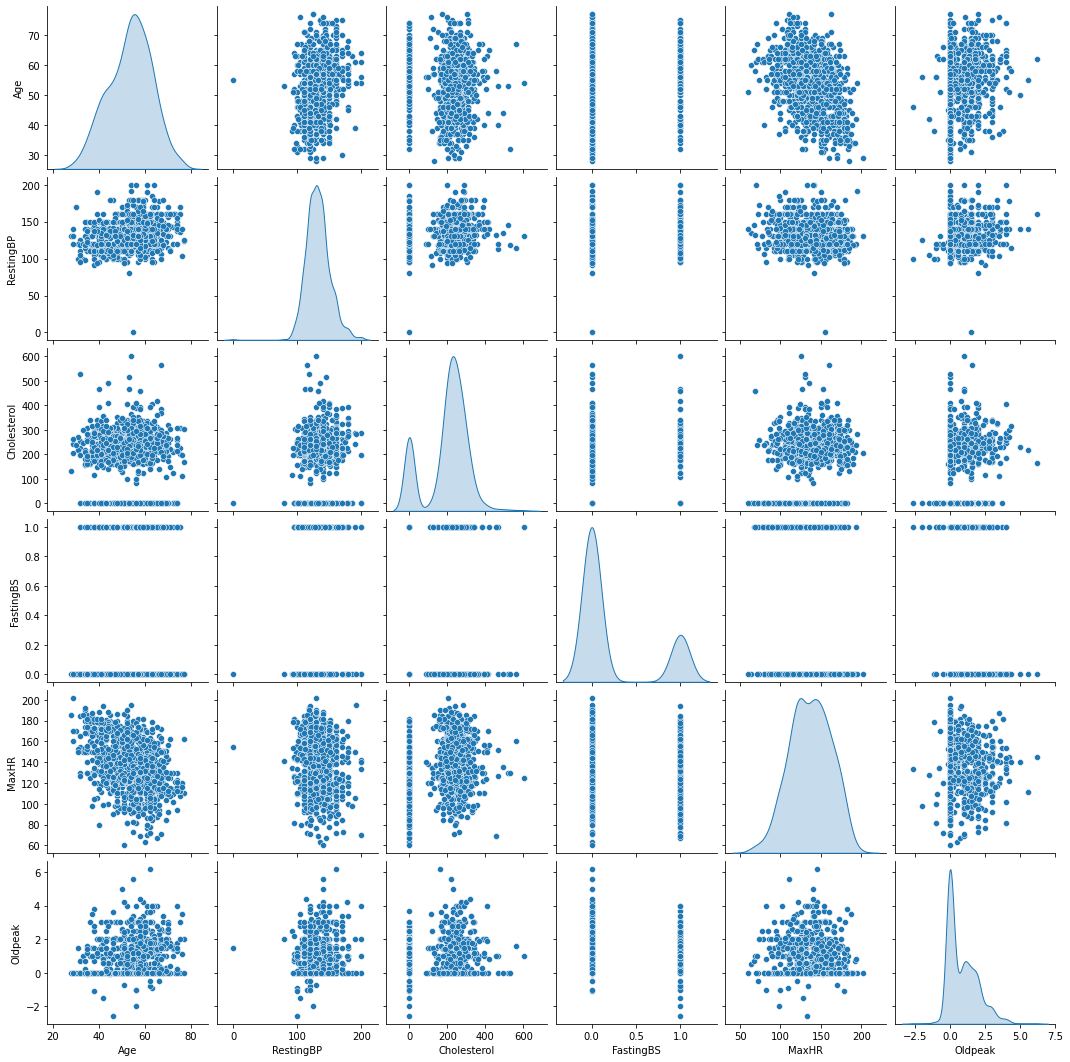

In [202]:
df_numeric = data.loc[:, numeric_list]
sns.pairplot(df_numeric, diag_kind = "kde")
plt.show()

In [203]:
data.shape

(918, 12)

In [204]:
X=data.iloc[:,:11]
Y=data.iloc[:,11]

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

In [206]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

In [207]:
nomi_col =[1,2,8,10]
ordi_col =[6]

trans = make_column_transformer((OneHotEncoder(sparse = False),nomi_col),(OrdinalEncoder(),ordi_col),remainder = 'passthrough')

In [208]:
de=trans.fit_transform(X_train)
me = trans.fit_transform(X_test)

In [209]:
de=pd.DataFrame(de)
me = pd.DataFrame(me)

In [210]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Model : KNN

SIMPLE KNN


In [211]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

sfs1 = SFS(KNN, k_features=8, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_KNN = make_pipeline(trans,sfs1,KNN)

In [212]:
# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            {
#                                'n_neighbors':np.arange(3,8,1),
#                                'weights':['unifrom','distance']
#                             },cv=5
#                            )
# grid_search.fit(de,y_train)

In [213]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# sfs1 = SFS(KNN, 
#            k_features=8, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=3)

# sfs1 = sfs1.fit(de, y_train)

In [214]:
# grid_search.best_params_

In [215]:
# sfs1.subsets_

In [216]:
pipe_KNN.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-05-06 10:37:27] Features: 1/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-05-06 10:37:27] Features: 2/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-05-06 10:37:27] Features: 3/8 -- score: 0.822429906542056[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=8, scoring='accuracy',
                                           verbose=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [217]:
pred_KNN = pipe_KNN.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN,y_test)*100

85.86956521739131

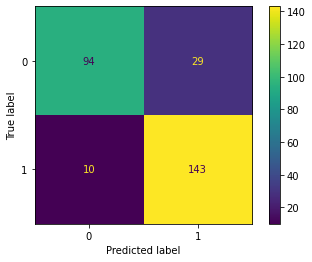

In [219]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_KNN,X_test,y_test)

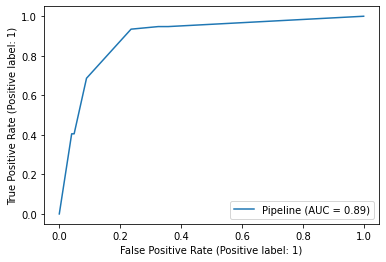

In [220]:
metrics.plot_roc_curve(pipe_KNN, X_test,y_test)

PCA KNN

In [221]:
pca=PCA(n_components=12,svd_solver="full")
sfs1 = SFS(KNN, k_features=6, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_KNN_pca = make_pipeline(trans,pca,sfs1,KNN)

In [222]:
pipe_KNN_pca.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-05-06 10:37:29] Features: 1/6 -- score: 0.7383177570093459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-05-06 10:37:29] Features: 2/6 -- score: 0.8084112149532711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-05-06 10:37:29] Features: 3/6 -- score: 0.8130841121495328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('pca', PCA(n_components=12, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=6, scoring='accuracy',
                                           verbose=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [223]:
pred_KNN_pca = pipe_KNN_pca.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN_pca,y_test)*100

86.59420289855072

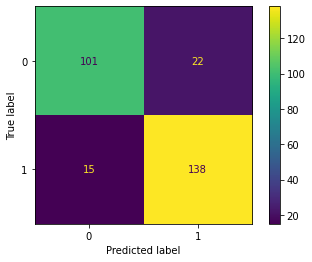

In [225]:

plot_confusion_matrix(pipe_KNN_pca,X_test,y_test)

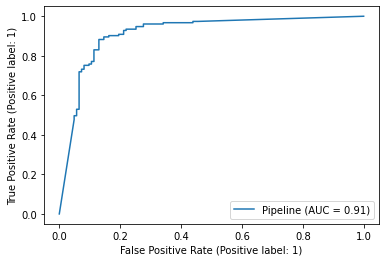

In [226]:
metrics.plot_roc_curve(pipe_KNN_pca, X_test,y_test)

LDA KNN

In [227]:
lda=LinearDiscriminantAnalysis()
pipe_KNN_lda = make_pipeline(trans,lda,KNN)

In [228]:
xx=lda.fit_transform(de,y_train)

In [229]:
pipe_KNN_lda.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [230]:
pred_KNN_lda = pipe_KNN_lda.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN_lda,y_test)*100

80.79710144927536

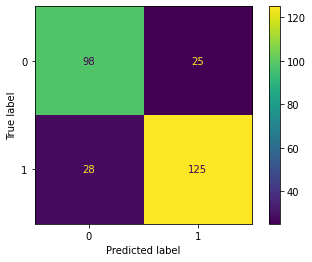

In [232]:
plot_confusion_matrix(pipe_KNN_lda,X_test,y_test)

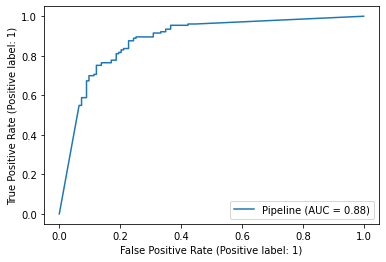

In [233]:
metrics.plot_roc_curve(pipe_KNN_lda, X_test,y_test)

## Model : Random Forest Classifier

Simple Random Forest Classifier

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=95,max_depth=5,criterion='gini')


In [236]:
# grid_search = GridSearchCV(model,
#                            {
#                                'criterion':['gini','entropy'],
#                               'n_estimators':np.arange(80,125,5),
#                               'max_depth':np.arange(1,8,1),
                            
#                             },cv=5
#                            )
# grid_search.fit(de,y_train)

In [237]:
# grid_search.best_params_

In [238]:
# params = {'criterion':['gini','entropy'],'max_depth':[None,2,6,8,12],'min_samples_split':[2,4,7,10],'min_samples_leaf':[15,100]}
g_pipe = make_pipeline(trans,model)

In [239]:
g_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=95))])

In [240]:
predictions = g_pipe.predict(X_test)

In [241]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

90.94202898550725

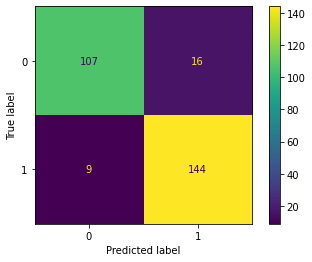

In [242]:
plot_confusion_matrix(g_pipe,X_test,y_test)

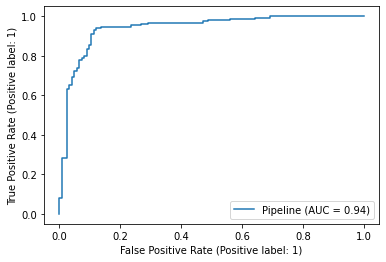

In [243]:
metrics.plot_roc_curve(g_pipe, X_test,y_test)

PCA Random Forest Classifier

In [244]:
pca=PCA(n_components=13,svd_solver="full")
g_pipe_pca = make_pipeline(trans,pca,model)

In [245]:
g_pipe_pca.fit(X_train,y_train)
predictions = g_pipe_pca.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

91.30434782608695

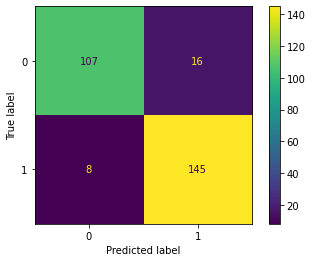

In [247]:
plot_confusion_matrix(g_pipe_pca,X_test,y_test)

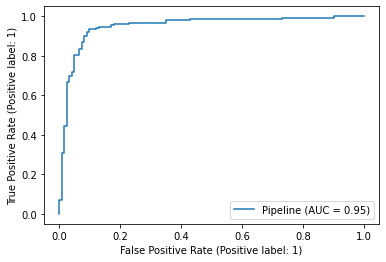

In [248]:
metrics.plot_roc_curve(g_pipe_pca, X_test,y_test)

LDA Random Forest Classifier

In [249]:
lda=LinearDiscriminantAnalysis()
g_pipe_lda = make_pipeline(trans,lda,model)

In [250]:
g_pipe_lda.fit(X_train,y_train)
predictions = g_pipe_lda.predict(X_test)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

84.78260869565217

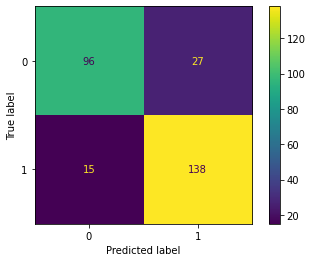

In [252]:
plot_confusion_matrix(g_pipe_lda,X_test,y_test)

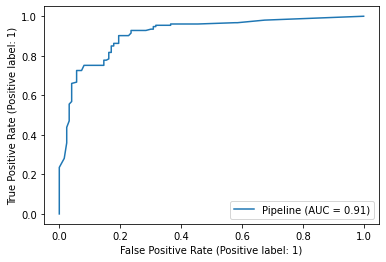

In [253]:
metrics.plot_roc_curve(g_pipe_lda, X_test,y_test)

## Model : SVC

Simple SVC

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc=SVC()
sfs2 = SFS(svc, k_features=13, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
svm_pipe = make_pipeline(trans,StandardScaler(),sfs2, svc)
svm_pipe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished

[2022-05-06 10:37:35] Features: 1/13 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished

[2022-05-06 10:37:35] Features: 2/13 -- score: 0.8333333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2022-05-06 10:37:36] Features: 3/13 -- score: 0.8348909657320872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3, estimator=SVC(), k_features=13,
                                           scoring='accuracy', verbose=2)),
                ('svc', SVC())])

In [255]:
preds = svm_pipe.predict(X_test)

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

89.4927536231884

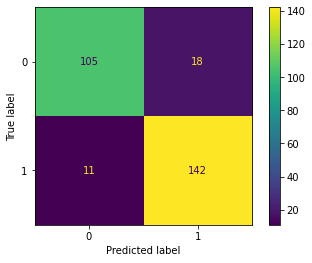

In [257]:
plot_confusion_matrix(svm_pipe,X_test,y_test)


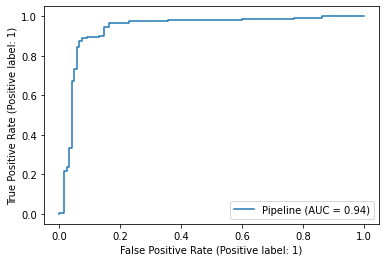

In [258]:
metrics.plot_roc_curve(svm_pipe, X_test,y_test)

PCA SVC

In [259]:
pca=PCA(n_components=13,svd_solver="full")

In [260]:
sfs2 = SFS(svc, k_features=9, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)

svm_pipe_pca = make_pipeline(trans,StandardScaler(),pca,sfs2, svc)
svm_pipe_pca.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.7s finished

[2022-05-06 10:37:43] Features: 1/9 -- score: 0.8489096573208723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-05-06 10:37:44] Features: 2/9 -- score: 0.8566978193146418[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-05-06 10:37:44] Features: 3/9 -- score: 0.8566978193146418[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=13, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3, estimator=SVC(), k_features=9,
                                           scoring='accuracy', verbose=2)),
                ('svc', SVC())])

In [261]:
preds = svm_pipe_pca.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

89.85507246376811

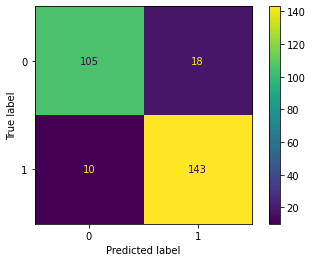

In [263]:
plot_confusion_matrix(svm_pipe_pca,X_test,y_test)

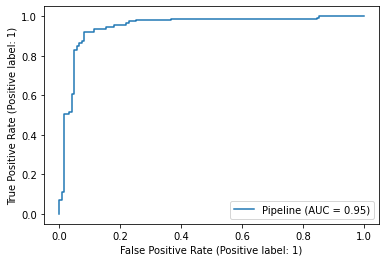

In [264]:
metrics.plot_roc_curve(svm_pipe_pca, X_test,y_test)

LDA SVC

In [265]:
svm_pipe_lda = make_pipeline(trans,StandardScaler(),lda,svc)

In [266]:
svm_pipe_lda.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('svc', SVC())])

In [267]:
preds = svm_pipe_lda.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

86.59420289855072

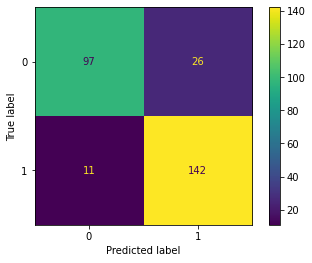

In [269]:
plot_confusion_matrix(svm_pipe_lda,X_test,y_test)

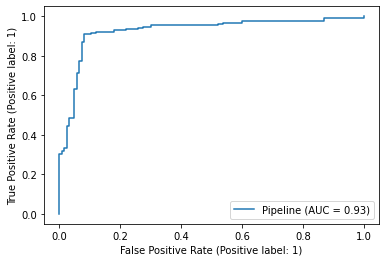

In [270]:
metrics.plot_roc_curve(svm_pipe_lda, X_test,y_test)

## Model : MLPClassifier

Simple MLPClassifier

In [271]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
sfs3 = SFS(KNN, k_features=8, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_mlp = make_pipeline(trans,sfs3,classifier)

In [272]:
pipe_mlp.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2022-05-06 10:37:47] Features: 1/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-05-06 10:37:48] Features: 2/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-05-06 10:37:48] Features: 3/8 -- score: 0.822429906542056[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=8, scoring='accuracy',
                                           verbose=2)),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300,
                               random_state=1))])

In [273]:
y_pred_mlp = pipe_mlp.predict(X_test)

In [274]:
accuracy_score(y_pred_mlp,y_test)*100

86.95652173913044

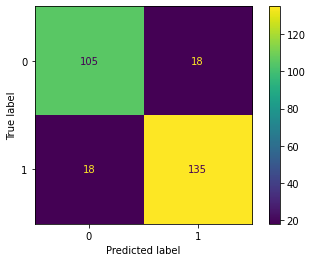

In [275]:
plot_confusion_matrix(pipe_mlp,X_test,y_test)

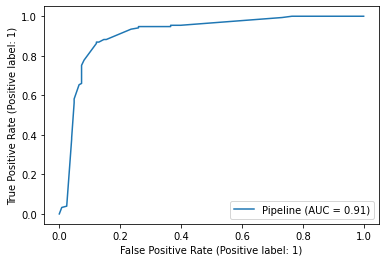

In [276]:
metrics.plot_roc_curve(pipe_mlp, X_test,y_test)

PCA MLPClassifier

In [277]:
pca=PCA(n_components=12,svd_solver="full")

pipe_mlp_pca = make_pipeline(trans,pca,sfs3,classifier)

In [278]:
pipe_mlp_pca.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-05-06 10:37:52] Features: 1/8 -- score: 0.7383177570093459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-05-06 10:37:52] Features: 2/8 -- score: 0.8084112149532711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-05-06 10:37:52] Features: 3/8 -- score: 0.8130841121495328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('pca', PCA(n_components=12, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=8, scoring='accuracy',
                                           verbose=2)),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300,
                               random_stat

In [279]:
y_pred_mlp_pca = pipe_mlp_pca.predict(X_test)

In [280]:
accuracy_score(y_pred_mlp_pca,y_test)*100

84.42028985507247

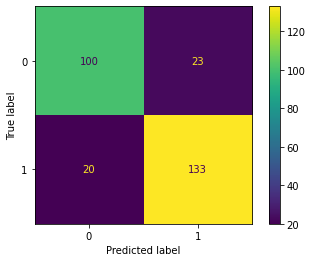

In [281]:
plot_confusion_matrix(pipe_mlp_pca,X_test,y_test)

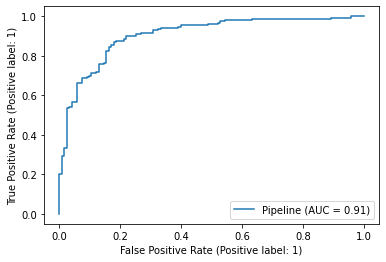

In [282]:
metrics.plot_roc_curve(pipe_mlp_pca, X_test,y_test)

LDA MLPClassifier

In [283]:
lda=LinearDiscriminantAnalysis()
pipe_mlp_lda = make_pipeline(trans,lda,classifier)

In [284]:
pipe_mlp_lda.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300,
                               random_state=1))])

In [285]:
y_pred_mlp_lda = pipe_mlp_lda.predict(X_test)

In [286]:
accuracy_score(y_pred_mlp_lda,y_test)*100

86.23188405797102

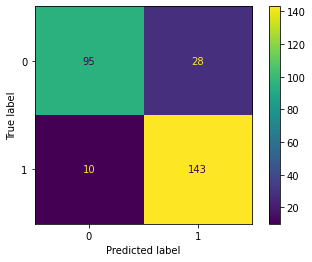

In [287]:
plot_confusion_matrix(pipe_mlp_lda,X_test,y_test)

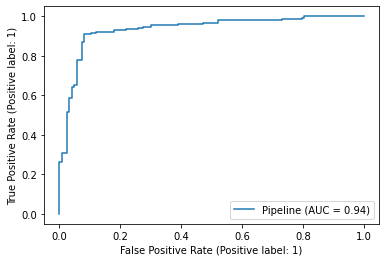

In [288]:
metrics.plot_roc_curve(pipe_mlp_lda, X_test,y_test)